In [1]:
import numpy as np
import fireducks.pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
y = df['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [6]:
X = df.drop(columns=['target'])
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [8]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.322332,0.354941,0.274575,0.148515,0.264026,0.600358,0.326733,0.167678,0.699670,0.182343,0.771177
std,0.189210,0.466011,0.344017,0.165454,0.118335,0.356198,0.262930,0.174849,0.469794,0.187270,0.308113,0.255652,0.204092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.500000,0.000000,0.666667
50%,0.541667,1.000000,0.333333,0.339623,0.260274,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.666667
75%,0.666667,1.000000,0.666667,0.433962,0.339041,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1211)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(203, 13) (100, 13) (203,) (100,)


In [10]:
class LogisticRegression():
    def __init__(self, X, y, learning_rate = 0.001, epochs = 100, threshold = 0.7, lambda_ = 1):
        self.X = X
        self.y = y

        self.learning_rate = learning_rate
        self.epochs = epochs
        self.threshold = threshold
        self.lambda_ = lambda_
        # Initialize weight vector and bias
        np.random.seed(1211)
        self.w = np.random.rand(X.shape[1])
        self.b = 0
        self.m = X.shape[0]

    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    def forward(self, X):
        return self.sigmoid(X @ self.w + self.b)
        
    def backward(self):
        hist = []
        for _ in range(self.epochs):
            y_hat = self.forward(self.X)
            bce = (-1 / self.m * np.sum(self.y * np.log(y_hat) + (1 - self.y) * np.log(1 - y_hat))) + self.lambda_ / (2 * self.m) * np.sum(self.w**2)
            hist.append(bce)
            err = (y_hat - self.y)
            dJ_dw = 1 / self.m * err @ self.X + (self.lambda_ / self.m * self.w)
            dJ_db = 1 / self.m * np.sum(err)
            self.w -= self.learning_rate * dJ_dw
            self.b -= self.learning_rate * dJ_db
        plt.plot(range(self.epochs), hist)
        plt.xlabel('Epochs')
        plt.ylabel('Err')
        plt.show()

    def predict(self, X):
        return (self.forward(X) >= self.threshold).astype(int)

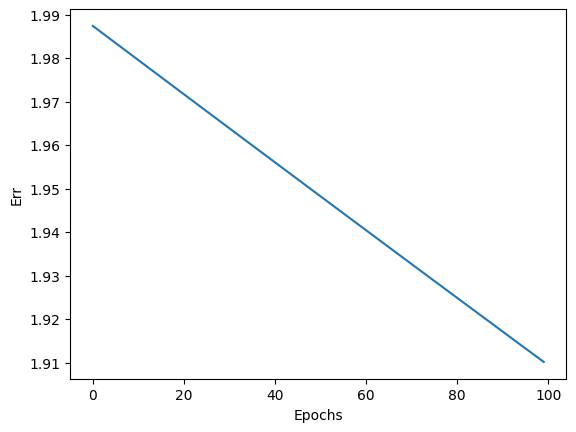

In [11]:
model = LogisticRegression(X_train, y_train, epochs=100, threshold=0.7, lambda_=1)
model.backward()

In [12]:
pred = model.predict(X_test)
pred

238    1
84     1
149    1
114    1
228    1
      ..
289    1
145    1
26     1
99     1
102    1
Length: 100, dtype: int64

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.55

In [17]:
from sklearn.linear_model import LogisticRegression

skmodel = LogisticRegression()
skmodel.fit(X_train, y_train)

accuracy_score(y_test, skmodel.predict(X_test)) # Wait.. 0.84 WTF

0.84

In [18]:
skmodel.coef_

array([[-0.61506174, -1.1060843 ,  1.86800659, -1.10048447, -0.2830761 ,
        -0.1431891 ,  0.45568408,  1.48561705, -0.91185781, -1.57122683,
         1.10488164, -1.82844754, -1.60090478]])